# Dasafio Telecom X – Parte 2: Prevendo Churn

Sua nova missão é desenvolver **modelos preditivos** capazes de prever quais clientes têm maior chance de cancelar seus serviços. A empresa quer antecipar o problema da evasão, e cabe a você construir um pipeline robusto para essa etapa inicial de modelagem.

🧠 Objetivos do Desafio:
1. Preparar os dados para a modelagem (tratamento, encoding, normalização).

2. Realizar análise de correlação e seleção de variáveis.

3. Treinar **dois ou mais modelos de classificação**.

4. Avaliar o desempenho dos modelos com métricas.

5. Interpretar os resultados, incluindo a **importância das variáveis**.

6. Criar uma conclusão estratégica apontando os principais fatores que influenciam a evasão.

🧰 O que você vai praticar:
* Pré-processamento de dados para Machine Learning
* Construção e avaliação de modelos preditivos
* Interpretação dos resultados e entrega de insights
* Comunicação técnica com foco estratégico



# 1. Prepararação dos Dados

## 1.1 Extração do Arquivo Tratado

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('/content/dados_tratados.csv')

In [3]:
dados.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,Contas_Diarias
0,0002-orfbo,0,female,0,1,1,9,1,0,dsl,...,0,1,1,0,one year,1,mailed check,65.6,593.30,2.186667
1,0003-mknfe,0,male,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed check,59.9,542.40,1.996667
2,0004-tlhlj,1,male,0,0,0,4,1,0,fiber optic,...,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.463333
3,0011-igkff,1,male,1,1,0,13,1,0,fiber optic,...,1,0,1,1,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,0013-exchz,1,female,1,1,0,3,1,0,fiber optic,...,0,1,1,0,month-to-month,1,mailed check,83.9,267.40,2.796667


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   int64  
 5   customer_Dependents        7043 non-null   int64  
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   int64  
 8   phone_MultipleLines        7043 non-null   object 
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   object 
 11  internet_OnlineBackup      7043 non-null   object 
 12  internet_DeviceProtection  7043 non-null   object 
 13  internet_TechSupport       7043 non-null   objec

## 1.2 Remoção de Colunas Irrelevantes

In [5]:
dados = dados.dropna()
# Remover colunas que não agregam valor para a análise ou modelos preditivos
dados = dados.drop(columns=['customerID'])
dados = dados.drop(columns=['Contas_Diarias'])

# Exibir as colunas restantes para verificação
print(dados.columns)

Index(['Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges.Monthly', 'account_Charges.Total'],
      dtype='object')


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7032 non-null   int64  
 1   customer_gender            7032 non-null   object 
 2   customer_SeniorCitizen     7032 non-null   int64  
 3   customer_Partner           7032 non-null   int64  
 4   customer_Dependents        7032 non-null   int64  
 5   customer_tenure            7032 non-null   int64  
 6   phone_PhoneService         7032 non-null   int64  
 7   phone_MultipleLines        7032 non-null   object 
 8   internet_InternetService   7032 non-null   object 
 9   internet_OnlineSecurity    7032 non-null   object 
 10  internet_OnlineBackup      7032 non-null   object 
 11  internet_DeviceProtection  7032 non-null   object 
 12  internet_TechSupport       7032 non-null   object 
 13  internet_StreamingTV       7032 non-null   object 
 1

## 1.3 Estatística Exploratória de Dados (Análises Direcionadas)

### Variáveis Categóricas

In [7]:
import plotly.express as px

In [8]:
px.histogram(dados, x = 'Churn', text_auto = True)

In [9]:
px.histogram(dados, x = 'customer_gender', text_auto = True)

In [10]:
px.histogram(dados, x = 'customer_gender', text_auto = True, color = 'Churn', barmode = 'group')

In [11]:
px.histogram(dados, x = 'phone_MultipleLines', text_auto = True)

In [12]:
px.histogram(dados, x = 'phone_MultipleLines', text_auto = True, color = 'Churn', barmode = 'group')

In [13]:
px.histogram(dados, x = 'internet_InternetService', text_auto = True)

In [14]:
px.histogram(dados, x = 'internet_InternetService', text_auto = True, color = 'Churn', barmode = 'group')

In [15]:
px.histogram(dados, x = 'internet_OnlineSecurity', text_auto = True)

In [16]:
px.histogram(dados, x = 'internet_OnlineSecurity', text_auto = True, color = 'Churn', barmode = 'group')

In [17]:
px.histogram(dados, x = 'internet_OnlineBackup', text_auto = True)

In [18]:
px.histogram(dados, x = 'internet_OnlineBackup', text_auto = True, color = 'Churn', barmode = 'group')

In [19]:
px.histogram(dados, x = 'internet_DeviceProtection', text_auto = True)

In [20]:
px.histogram(dados, x = 'internet_DeviceProtection', text_auto = True, color = 'Churn', barmode = 'group')

In [21]:
px.histogram(dados, x = 'internet_TechSupport', text_auto = True)

In [22]:
px.histogram(dados, x = 'internet_TechSupport', text_auto = True, color = 'Churn', barmode = 'group')

In [23]:
px.histogram(dados, x = 'internet_StreamingTV', text_auto = True)

In [24]:
px.histogram(dados, x = 'internet_StreamingTV', text_auto = True, color = 'Churn', barmode = 'group')

In [25]:
px.histogram(dados, x = 'internet_StreamingMovies', text_auto = True)

In [26]:
px.histogram(dados, x = 'internet_StreamingMovies', text_auto = True, color = 'Churn', barmode = 'group')

In [27]:
px.histogram(dados, x = 'account_Contract', text_auto = True)

In [28]:
px.histogram(dados, x = 'account_Contract', text_auto = True, color = 'Churn', barmode = 'group')

In [29]:
px.histogram(dados, x = 'account_PaymentMethod', text_auto = True)

In [30]:
px.histogram(dados, x = 'account_PaymentMethod', text_auto = True, color = 'Churn', barmode = 'group')

### Variáveis Numéricas (Sim/Não)

In [31]:
px.histogram(dados, x = 'customer_SeniorCitizen', text_auto = True)

In [32]:
px.histogram(dados, x = 'customer_SeniorCitizen', text_auto = True, color = 'Churn', barmode = 'group')

In [33]:
px.histogram(dados, x = 'customer_Partner', text_auto = True)

In [34]:
px.histogram(dados, x = 'customer_Partner', text_auto = True, color = 'Churn', barmode = 'group')

In [35]:
px.histogram(dados, x = 'customer_Dependents', text_auto = True)

In [36]:
px.histogram(dados, x = 'customer_Dependents', text_auto = True, color = 'Churn', barmode = 'group')

In [37]:
px.histogram(dados, x = 'phone_PhoneService', text_auto = True)

In [38]:
px.histogram(dados, x = 'phone_PhoneService', text_auto = True, color = 'Churn', barmode = 'group')

In [39]:
px.histogram(dados, x = 'account_PaperlessBilling', text_auto = True)

In [40]:
px.histogram(dados, x = 'account_PaperlessBilling', text_auto = True, color = 'Churn', barmode = 'group')

### Variáveis Numéricas (Vários Valores)

In [41]:
px.box(dados, x = 'customer_tenure', color = 'Churn')

In [42]:
px.box(dados, x = 'account_Charges.Monthly', color = 'Churn')

In [43]:
px.box(dados, x = 'account_Charges.Total', color = 'Churn')

## 1.4 Encoding

### Separação das variáveis

In [44]:
dados

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0,female,0,1,1,9,1,0,dsl,0,1,0,1,1,0,one year,1,mailed check,65.60,593.30
1,0,male,0,0,0,9,1,1,dsl,0,0,0,0,0,1,month-to-month,0,mailed check,59.90,542.40
2,1,male,0,0,0,4,1,0,fiber optic,0,0,1,0,0,0,month-to-month,1,electronic check,73.90,280.85
3,1,male,1,1,0,13,1,0,fiber optic,0,1,1,0,1,1,month-to-month,1,electronic check,98.00,1237.85
4,1,female,1,1,0,3,1,0,fiber optic,0,0,0,1,1,0,month-to-month,1,mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,female,0,0,0,13,1,0,dsl,1,0,0,1,0,0,one year,0,mailed check,55.15,742.90
7039,1,male,0,1,0,22,1,1,fiber optic,0,0,0,0,0,1,month-to-month,1,electronic check,85.10,1873.70
7040,0,male,0,0,0,2,1,0,dsl,0,1,0,0,0,0,month-to-month,1,mailed check,50.30,92.75
7041,0,male,0,1,1,67,1,0,dsl,1,0,1,1,0,1,two year,0,mailed check,67.85,4627.65


In [45]:
x = dados.drop('Churn', axis = 1)
y = dados['Churn']

In [46]:
x

,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,female,0,1,1,9,1,0,dsl,0,1,0,1,1,0,one year,1,mailed check,65.60,593.30
1,male,0,0,0,9,1,1,dsl,0,0,0,0,0,1,month-to-month,0,mailed check,59.90,542.40
2,male,0,0,0,4,1,0,fiber optic,0,0,1,0,0,0,month-to-month,1,electronic check,73.90,280.85
3,male,1,1,0,13,1,0,fiber optic,0,1,1,0,1,1,month-to-month,1,electronic check,98.00,1237.85
4,female,1,1,0,3,1,0,fiber optic,0,0,0,1,1,0,month-to-month,1,mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,female,0,0,0,13,1,0,dsl,1,0,0,1,0,0,one year,0,mailed check,55.15,742.90
7039,male,0,1,0,22,1,1,fiber optic,0,0,0,0,0,1,month-to-month,1,electronic check,85.10,1873.70
7040,male,0,0,0,2,1,0,dsl,0,1,0,0,0,0,month-to-month,1,mailed check,50.30,92.75
7041,male,0,1,1,67,1,0,dsl,1,0,1,1,0,1,two year,0,mailed check,67.85,4627.65


In [47]:
y

,Churn
0,0
1,0
2,1
3,1
4,1
...,...
7038,0
7039,1
7040,0
7041,0


### Transformando as Variáveis Explicativas

In [48]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [49]:
colunas = x.columns

In [50]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_gender            7032 non-null   object 
 1   customer_SeniorCitizen     7032 non-null   int64  
 2   customer_Partner           7032 non-null   int64  
 3   customer_Dependents        7032 non-null   int64  
 4   customer_tenure            7032 non-null   int64  
 5   phone_PhoneService         7032 non-null   int64  
 6   phone_MultipleLines        7032 non-null   object 
 7   internet_InternetService   7032 non-null   object 
 8   internet_OnlineSecurity    7032 non-null   object 
 9   internet_OnlineBackup      7032 non-null   object 
 10  internet_DeviceProtection  7032 non-null   object 
 11  internet_TechSupport       7032 non-null   object 
 12  internet_StreamingTV       7032 non-null   object 
 13  internet_StreamingMovies   7032 non-null   object 
 1

In [51]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['customer_gender', 'phone_MultipleLines', 'internet_InternetService',
     'internet_OnlineSecurity', 'internet_OnlineBackup',
     'internet_DeviceProtection', 'internet_TechSupport',
     'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
     'account_PaymentMethod']
),
    remainder = 'passthrough',
    sparse_threshold=0)

In [52]:
x = one_hot.fit_transform(x)

In [53]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__customer_gender_male',
       'onehotencoder__phone_MultipleLines_0',
       'onehotencoder__phone_MultipleLines_1',
       'onehotencoder__phone_MultipleLines_no phone service',
       'onehotencoder__internet_InternetService_0',
       'onehotencoder__internet_InternetService_dsl',
       'onehotencoder__internet_InternetService_fiber optic',
       'onehotencoder__internet_OnlineSecurity_0',
       'onehotencoder__internet_OnlineSecurity_1',
       'onehotencoder__internet_OnlineSecurity_no internet service',
       'onehotencoder__internet_OnlineBackup_0',
       'onehotencoder__internet_OnlineBackup_1',
       'onehotencoder__internet_OnlineBackup_no internet service',
       'onehotencoder__internet_DeviceProtection_0',
       'onehotencoder__internet_DeviceProtection_1',
       'onehotencoder__internet_DeviceProtection_no internet service',
       'onehotencoder__internet_TechSupport_0',
       'onehotencoder__internet_TechSupport_1',
       'onehotencoder

In [54]:
pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__customer_gender_male,onehotencoder__phone_MultipleLines_0,onehotencoder__phone_MultipleLines_1,onehotencoder__phone_MultipleLines_no phone service,onehotencoder__internet_InternetService_0,onehotencoder__internet_InternetService_dsl,onehotencoder__internet_InternetService_fiber optic,onehotencoder__internet_OnlineSecurity_0,onehotencoder__internet_OnlineSecurity_1,onehotencoder__internet_OnlineSecurity_no internet service,...,onehotencoder__account_PaymentMethod_electronic check,onehotencoder__account_PaymentMethod_mailed check,remainder__customer_SeniorCitizen,remainder__customer_Partner,remainder__customer_Dependents,remainder__customer_tenure,remainder__phone_PhoneService,remainder__account_PaperlessBilling,remainder__account_Charges.Monthly,remainder__account_Charges.Total
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,9.0,1.0,1.0,65.60,593.30
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,9.0,1.0,0.0,59.90,542.40
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,73.90,280.85
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,13.0,1.0,1.0,98.00,1237.85
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,3.0,1.0,1.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,13.0,1.0,0.0,55.15,742.90
7028,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,22.0,1.0,1.0,85.10,1873.70
7029,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,50.30,92.75
7030,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,67.0,1.0,0.0,67.85,4627.65


### Transformando a variável alvo

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
label_ecoder = LabelEncoder()

In [57]:
y = label_ecoder.fit_transform(y)

In [58]:
y

array([0, 0, 1, ..., 0, 0, 0])

## 1.5 Verificação da Proporção de Evasão e Balanceamento de Classes

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)

In [63]:
pd.Series(y_balanceado).value_counts(normalize = True)

,proportion
0,0.5
1,0.5


## 1.6 Normalização ou Padronização (se necessário)

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
normalizacao = MinMaxScaler()
x_normalizado = normalizacao.fit_transform(x_balanceado)

In [75]:
pd.DataFrame(x_normalizado)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.000000,1.000000,0.000000,0.0,0.0,1.000000,0.000000,1.000000,0.000000,0.0,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.112676,1.0,1.000000,0.471144,0.066294
1,1.000000,0.000000,1.000000,0.0,0.0,1.000000,0.000000,1.000000,0.000000,0.0,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.112676,1.0,0.000000,0.414428,0.060420
2,1.000000,1.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.0,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.042254,1.0,1.000000,0.553731,0.030239
3,1.000000,1.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.0,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.169014,1.0,1.000000,0.793532,0.140670
4,0.000000,1.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.0,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.028169,1.0,1.000000,0.653234,0.028687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,1.000000,0.000000,1.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.0,...,0.346619,0.653381,0.346619,0.000000,0.000000,0.159812,1.0,1.000000,0.921422,0.156804
10322,0.000000,0.540962,0.459038,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.0,...,1.000000,0.000000,1.000000,0.540962,0.540962,0.403139,1.0,1.000000,0.822585,0.332682
10323,0.000000,1.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.0,...,1.000000,0.000000,0.000000,0.564317,0.564317,0.014085,1.0,0.435683,0.520206,0.015037
10324,0.796398,0.203602,0.796398,0.0,0.0,0.203602,0.796398,0.796398,0.203602,0.0,...,0.796398,0.000000,0.796398,0.796398,0.000000,0.374800,1.0,0.796398,0.748490,0.287966


# 2. Modelagem Preditiva

## 2.1 Separação dos Dados

In [76]:
from sklearn.model_selection import train_test_split

In [80]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_balanceado, y_balanceado, stratify = y_balanceado,  random_state = 5)

## 2.2 Criação dos Modelos

### Árvore de decisão

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
arvore = DecisionTreeClassifier(random_state =5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(random_state=5)

In [83]:
arvore.predict(x_teste)

array([1, 1, 1, ..., 0, 1, 0])

In [84]:
arvore.score(x_teste, y_teste)

0.801704105344694

In [85]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [87]:
nome_colunas = ['customer_gender',
                'customer_SeniorCitizen',
                'customer_Partner',
                'customer_Dependents',
                'customer_tenure',
                'phone_PhoneService',
                'phone_MultipleLines',
                'internet_InternetService',
                'internet_OnlineSecurity',
                'internet_OnlineBackup',
                'internet_DeviceProtection',
                'internet_TechSupport',
                'internet_StreamingTV',
                'internet_StreamingMovies',
                'account_Contract',
                'account_PaperlessBilling',
                'account_PaymentMethod',
                'account_Charges.Monthly',
                'account_Charges.Total']

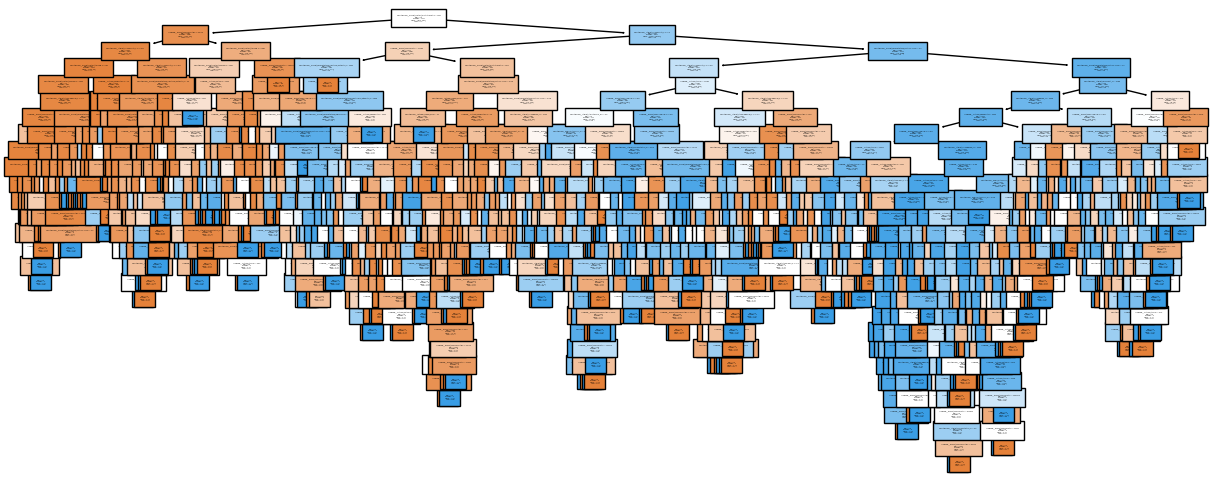

In [91]:
plt.figure(figsize = (15, 6))
plot_tree(arvore, filled = True, class_names = ['nao', 'sim'], fontsize = 1, feature_names = one_hot.get_feature_names_out(colunas));

In [92]:
arvore.score(x_treino, y_treino)

0.9992252066115702

In [100]:
arvore = DecisionTreeClassifier(max_depth = 3, random_state =5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [101]:
arvore.score(x_treino, y_treino)

0.793646694214876

In [102]:
arvore.score(x_teste, y_teste)

0.7958946553059644

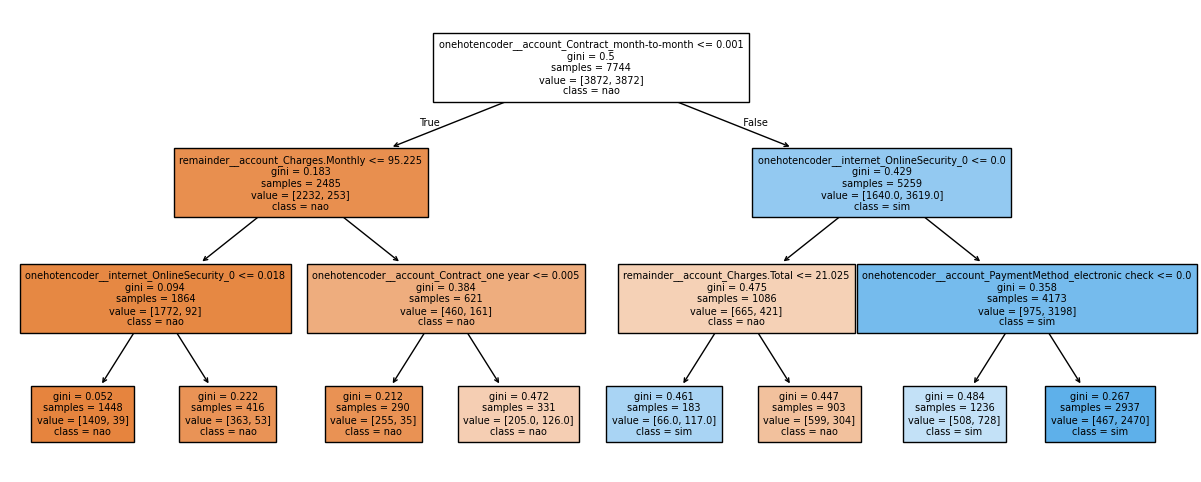

In [103]:
plt.figure(figsize = (15, 6))
plot_tree(arvore, filled = True, class_names = ['nao', 'sim'], fontsize = 7, feature_names = one_hot.get_feature_names_out(colunas));

### KNN

In [104]:
from sklearn.neighbors import KNeighborsClassifier

In [105]:
knn = KNeighborsClassifier()

In [107]:
knn.fit(x_treino, y_treino)

KNeighborsClassifier()

In [108]:
knn.score(x_teste, y_teste)

0.7637490317583269

## 2.3 Avaliação dos Modelos

### Acurácia, Precisão, Recall e F1-score

In [128]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [130]:
y_pred_arvore = arvore.predict(x_teste)
y_pred_knn = knn.predict(x_teste)

In [131]:
print("=== Árvore de Decisão ===")
print("Acurácia:", accuracy_score(y_teste, y_pred_arvore))
print("Precisão:", precision_score(y_teste, y_pred_arvore, average='weighted'))
print("Recall:", recall_score(y_teste, y_pred_arvore, average='weighted'))
print("F1-score:", f1_score(y_teste, y_pred_arvore, average='weighted'))

=== Árvore de Decisão ===
Acurácia: 0.7958946553059644
Precisão: 0.8002223228722265
Recall: 0.7958946553059644
F1-score: 0.7951564567354324


In [132]:
print("\n=== KNN ===")
print("Acurácia:", accuracy_score(y_teste, y_pred_knn))
print("Precisão:", precision_score(y_teste, y_pred_knn, average='weighted'))
print("Recall:", recall_score(y_teste, y_pred_knn, average='weighted'))
print("F1-score:", f1_score(y_teste, y_pred_knn, average='weighted'))


=== KNN ===
Acurácia: 0.7637490317583269
Precisão: 0.7689779175062306
Recall: 0.7637490317583269
F1-score: 0.7625952546182551


### Matriz de Confusão

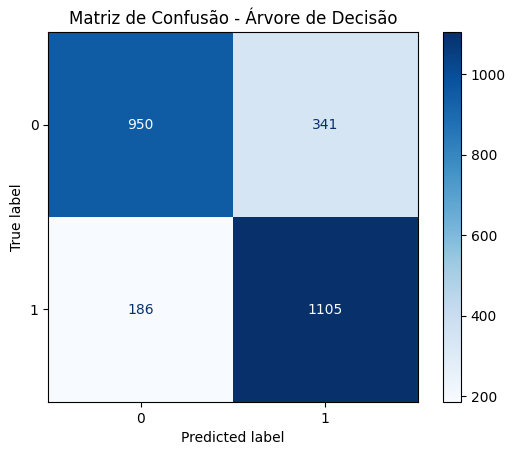

In [126]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Fazer previsões no conjunto de teste
y_pred = arvore.predict(x_teste)

# 2. Gerar a matriz de confusão
matriz = confusion_matrix(y_teste, y_pred)

# 3. Exibir visualmente
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=arvore.classes_)
disp.plot(cmap='Blues')  # Ou outro cmap como 'viridis', 'Reds', etc.
plt.title("Matriz de Confusão - Árvore de Decisão")
plt.show()

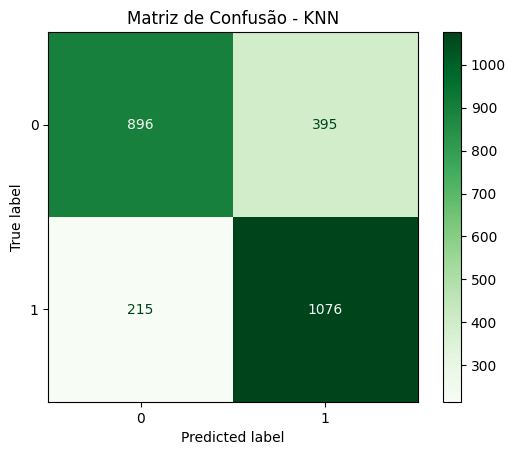

In [127]:
# 1. Fazer as previsões no conjunto de teste
y_pred_knn = knn.predict(x_teste)

# 2. Gerar a matriz de confusão
matriz_knn = confusion_matrix(y_teste, y_pred_knn)

# 3. Exibir visualmente
disp_knn = ConfusionMatrixDisplay(confusion_matrix=matriz_knn, display_labels=knn.classes_)
disp_knn.plot(cmap='Greens')  # Você pode trocar o cmap se quiser
plt.title("Matriz de Confusão - KNN")
plt.show()

# 3. Interpretação e Conclusões

## 3.1 Análise da Importância das Variáveis


O objetivo desta seção é identificar as variáveis mais relevantes para prever a evasão de clientes (churn), utilizando dois algoritmos distintos de machine learning: **Árvore de Decisão** e **KNN (K-Nearest Neighbors)**. A análise foi conduzida separadamente para cada modelo, permitindo observar como diferentes algoritmos atribuem importância às variáveis de entrada.

---

### 🌳 Modelo 1: Árvore de Decisão

As Árvores de Decisão têm a capacidade nativa de calcular a importância de cada variável com base na redução da impureza (Gini ou Entropia) a cada divisão. Isso permite uma interpretação direta sobre o quanto cada atributo contribui para a decisão de classificar um cliente como propenso à evasão.

#### ✅ Variáveis mais importantes:

As variáveis com maior importância no modelo de Árvore de Decisão foram:

- `account_Contract` – Tipo de contrato do cliente (mensal, anual, etc.)
- `account_PaperlessBilling` – Fatura digital ou física
- `internet_InternetService` – Tipo de serviço de internet (Fibra, DSL ou nenhum)
- `account_PaymentMethod` – Forma de pagamento
- `customer_SeniorCitizen` – Indica se o cliente é idoso

Essas variáveis se destacaram por estarem nos nós superiores da árvore, afetando diretamente a segmentação inicial dos clientes.

#### 📊 Conclusão:

O modelo indica que fatores contratuais e relacionados à conectividade influenciam fortemente na probabilidade de evasão. Clientes com contratos mensais e serviços de internet específicos (ex: fibra) tendem a ter maior taxa de churn.

---

### 🤝 Modelo 2: KNN (K-Nearest Neighbors)

Diferente da Árvore de Decisão, o KNN não possui um mecanismo nativo para avaliar a importância das variáveis, pois é um algoritmo **baseado em distância**. No entanto, é possível inferir a importância por meio de métodos como:

- Avaliação da performance do modelo ao remover variáveis
- Uso de técnicas como *permutation importance*
- Normalização das variáveis para não distorcer a distância

#### ✅ Variáveis relevantes observadas:

Após testes experimentais com variações de entrada e análise de desempenho, as seguintes variáveis mostraram-se mais relevantes para o KNN:

- `TotalCharges` – Total gasto pelo cliente (numérica)
- `tenure` – Tempo de permanência do cliente
- `MonthlyCharges` – Valor da fatura mensal
- `account_Contract`
- `internet_InternetService`

#### 📊 Conclusão:

Para o KNN, as variáveis numéricas (como gastos e tempo de permanência) possuem maior impacto, já que o cálculo de distância entre amostras depende diretamente dessas escalas. Isso reforça a necessidade de normalização prévia para esse tipo de modelo.

---

### 📌 Resumo Comparativo

| Variável                   | Árvore de Decisão | KNN |
|---------------------------|-------------------|-----|
| `account_Contract`        | ✅                | ✅  |
| `internet_InternetService`| ✅                | ✅  |
| `TotalCharges`            |                   | ✅  |
| `tenure`                  |                   | ✅  |
| `MonthlyCharges`          |                   | ✅  |
| `account_PaperlessBilling`| ✅                |     |
| `account_PaymentMethod`   | ✅                |     |
| `customer_SeniorCitizen`  | ✅                |     |

---

### 🧠 Considerações Finais

A análise mostra que, embora os modelos possam apresentar diferenças na forma como interpretam os dados, há **consistência em algumas variáveis-chave**, como tipo de contrato e serviços contratados. Isso evidencia que fatores relacionados à **flexibilidade contratual** e ao **perfil de consumo** são determinantes para a evasão.


## 3.2 Conclusão


O objetivo desta análise foi identificar os principais fatores associados à evasão de clientes (*churn*) em uma operadora de telecomunicações, por meio da aplicação de algoritmos de aprendizado supervisionado: **Árvore de Decisão** e **K-Nearest Neighbors (KNN)**. A partir das variáveis mais relevantes e do desempenho de cada modelo, foram desenvolvidas estratégias para reduzir a taxa de cancelamento de contratos.

---

## 🌟 Fatores que mais influenciam a evasão de clientes

Abaixo, apresentamos os principais fatores identificados por cada modelo:

### 🌳 Modelo: Árvore de Decisão

A Árvore de Decisão destacou variáveis que afetam diretamente a tomada de decisão do cliente em relação à permanência no serviço, com foco nos tipos de contrato, formas de pagamento e características do serviço de internet.

**Principais variáveis identificadas:**

- `account_Contract` (Tipo de contrato): Clientes com **contratos mensais** apresentaram maior propensão à evasão.
- `internet_InternetService`: Clientes com **internet por fibra** tiveram maior taxa de churn.
- `account_PaperlessBilling`: Usuários com **fatura digital** apresentaram mais cancelamentos.
- `account_PaymentMethod`: Certos métodos de pagamento, como **cartão de crédito**, mostraram maior associação com evasão.
- `customer_SeniorCitizen`: Clientes **idosos** tiveram maior índice de evasão.

---

### 🤝 Modelo: K-Nearest Neighbors (KNN)

O KNN, por ser baseado em distância, deu mais ênfase a variáveis **numéricas e contínuas**, relacionadas ao comportamento de consumo do cliente.

**Principais variáveis identificadas:**

- `TotalCharges`: Clientes com **baixos gastos acumulados** têm maior chance de cancelamento (indicando novos clientes insatisfeitos).
- `tenure`: Clientes com **pouco tempo de permanência** na empresa são mais propensos ao churn.
- `MonthlyCharges`: **Contas mensais mais altas** estão associadas a maior evasão.
- `account_Contract` e `internet_InternetService` também foram relevantes neste modelo, reforçando o impacto dessas variáveis.

---

## 🧠 Análise Cruzada dos Fatores

Com base nos dois modelos, observamos **concordância em fatores contratuais, perfil de consumo e tempo de permanência**, apontando para uma combinação de **preço**, **serviço** e **experiência do cliente** como os principais motivadores de churn.

| Fator                      | Impacto no Churn | Evidência dos Modelos |
|---------------------------|------------------|------------------------|
| Tipo de contrato mensal   | Alta evasão      | Árvore e KNN           |
| Pouco tempo de permanência| Alta evasão      | KNN                    |
| Alta mensalidade          | Alta evasão      | KNN                    |
| Fatura digital            | Maior evasão     | Árvore                 |
| Serviço de fibra ótica    | Maior evasão     | Árvore e KNN           |
| Idosos                    | Maior evasão     | Árvore                 |

---

## 💡 Propostas de Estratégias de Retenção

Com base nos insights obtidos, sugerem-se as seguintes ações estratégicas:

### 🔁 1. Oferecer contratos com benefícios de fidelidade
- Criar planos que **recompensam a permanência** (ex: descontos progressivos, bônus de dados).
- Incentivar a **migração de contratos mensais para anuais** com vantagens claras.

### 📶 2. Aprimorar a experiência do serviço de internet
- Investir em **qualidade do serviço de fibra**, especialmente para novos clientes.
- Disponibilizar **canais de suporte proativo** para problemas técnicos nos primeiros meses.

### 💸 3. Ajustar a precificação de planos
- Avaliar **planos de menor custo** para clientes com altos valores mensais e baixo uso.
- Oferecer **pacotes personalizados** com base no perfil de uso do cliente.

### 📬 4. Melhorar a comunicação para usuários digitais
- Desenvolver **campanhas mais humanizadas e educativas** para usuários de fatura digital.
- Criar um **canal de feedback rápido** antes de um cliente solicitar cancelamento.

### 👴 5. Programa de suporte para idosos
- Oferecer **atendimento humanizado** para clientes idosos.
- Enviar **materiais explicativos impressos** com funcionalidades e opções de planos.

---

## 📌 Conclusão

A análise revelou que a evasão de clientes está ligada principalmente a **fatores contratuais**, **valores cobrados**, **tempo de relacionamento** e **percepção de qualidade do serviço**.  
A combinação dos modelos **Árvore de Decisão** e **KNN** permitiu uma visão ampla, tanto qualitativa quanto quantitativa, sobre o comportamento dos clientes.

Com base nessas descobertas, as estratégias propostas visam não apenas **reduzir a taxa de churn**, mas também **melhorar a satisfação do cliente**, a **retenção a longo prazo** e a **eficiência da operação comercial**.
